***머신러닝 구현 절차**</br>
* 데이터 전처리</br>
* 데이터 특징 파악</br>
* 가설 설정</br>
* 유의 수준 설정</br>
* 모델 선택</br>
* 모델 학습과 성능평가</br>
* 모델 최적화</br>
* 모델 적용/ 예측</br>
* t-검정

In [ ]:
install.packages("extrafont")
library(extrafont)
system(" sudo apt-get install fonts-nanum-coding ")
font_import(pattern = "Nanum")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’


Registering fonts with R



Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] y


Scanning ttf files in /usr/share/fonts/, /usr/local/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/NanumBarunGothic

/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/NanumBarunGothicBold

/usr/share/fonts/truetype/nanum/NanumGothic.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/NanumGothic

/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/NanumGothicBold

/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/NanumGothicCoding

/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/NanumGothicCodingBold

/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/NanumMyeongjo

/usr/share/

In [ ]:
library(extrafont)
fonts()

Registering fonts with R



[1] "NanumBarunGothic"         "NanumGothic"             
[3] "NanumGothicCoding"        "NanumMyeongjo"           
[5] "NanumSquare Bold"         "NanumSquare"             
[7] "NanumSquareRound Bold"    "NanumSquareRound Regular"

In [ ]:
install.packages(c("tidyverse", "data.table"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(data.table)


Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




4번

In [ ]:
#https://drive.google.com/file/d/1XU0JMDOYX5sptUXEjj2V9ASf7TyZAWtX/view?usp=sharing

system("gdown --id 1XU0JMDOYX5sptUXEjj2V9ASf7TyZAWtX")

In [ ]:
system("ls", TRUE)

[1] "Regular_Season_Batter.csv" "sample_data"

In [ ]:
DF <- fread("/content/Regular_Season_Batter.csv") %>% as_tibble()

In [ ]:
DF %>% show()

# A tibble: 2,454 × 29
   batter_id batter_name  year team    avg     G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <dbl> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.339    50   183    27    62     9     0
 2         1 강경학       2011 한화  0         2     1     0     0     0     0
 3         1 강경학       2014 한화  0.221    41    86    11    19     2     3
 4         1 강경학       2015 한화  0.257   120   311    50    80     7     4
 5         1 강경학       2016 한화  0.158    46   101    16    16     3     2
 6         1 강경학       2017 한화  0.214    59    84    17    18     2     1
 7         1 강경학       2018 한화  0.278    77   245    42    68    11     1
 8         2 강구성       2013 NC    0         2     2     0     0     0     0
 9         2 강구성       2015 NC    0.2       4     5     0     1     1     0
10         2 강구성       2016 NC    0         2     3     0     0     0     0
# ℹ 2,444 more rows
# ℹ 18 more variables: HR <int>, TB <int>, RBI <int>

5번

In [ ]:
#2017 팀별 홈런과 OPS(OBP(출루율) +SLG(장타율))
HR_2017 <- DF %>% filter(year == 2017) %>% select(year, team, batter_name, HR, OPS) %>% na.omit()
HR_2017 %>% show()

# A tibble: 216 × 5
    year team  batter_name    HR   OPS
   <int> <chr> <chr>       <int> <dbl>
 1  2017 한화  강경학          0 0.552
 2  2017 NC    강구성          0 0    
 3  2017 롯데  강민호         22 0.843
 4  2017 한화  강상원          0 0.5  
 5  2017 LG    강승호          5 0.655
 6  2017 NC    강진성          1 0.925
 7  2017 삼성  강한울          0 0.684
 8  2017 한화  이종환          0 0    
 9  2017 넥센  고종욱          8 0.811
10  2017 삼성  구자욱         21 0.91 
# ℹ 206 more rows


6번

In [ ]:
summary(HR_2017)

      year          team           batter_name              HR        
 Min.   :2017   Length:216         Length:216         Min.   : 0.000  
 1st Qu.:2017   Class :character   Class :character   1st Qu.: 0.000  
 Median :2017   Mode  :character   Mode  :character   Median : 3.000  
 Mean   :2017                                         Mean   : 6.731  
 3rd Qu.:2017                                         3rd Qu.:10.250  
 Max.   :2017                                         Max.   :46.000  
      OPS        
 Min.   :0.0000  
 1st Qu.:0.5930  
 Median :0.7138  
 Mean   :0.6703  
 3rd Qu.:0.8113  
 Max.   :1.1110  

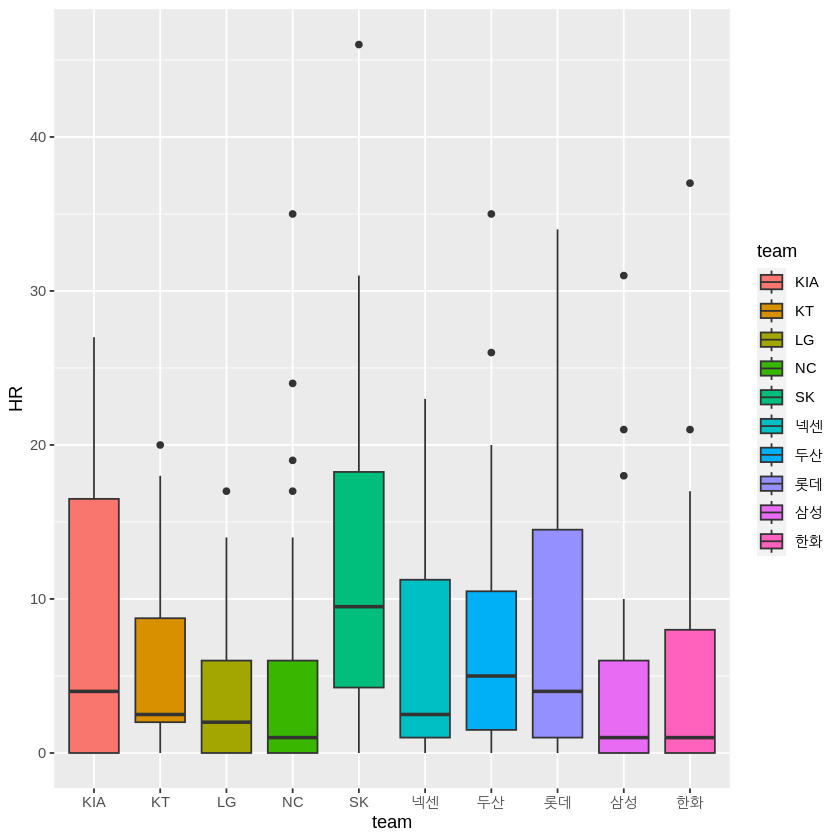

In [ ]:
ggplot(data = HR_2017, mapping = aes(x = team, y = HR)) +
  geom_boxplot(mapping = aes(fill = team))

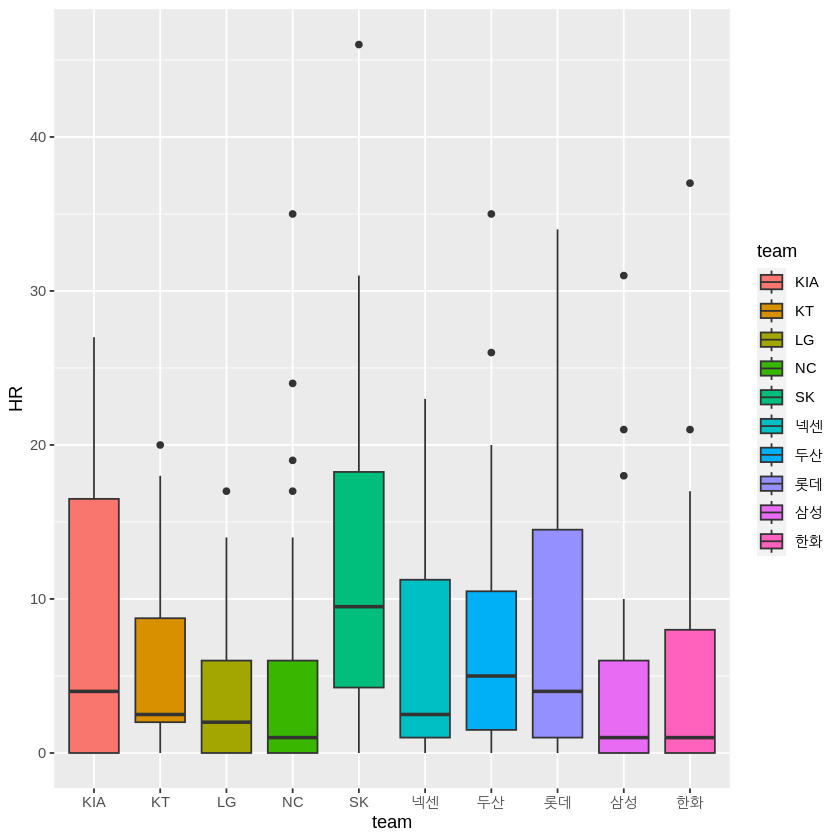

In [ ]:
HR_2017 %>% ggplot(mapping = aes(x = team, y = HR)) +
  geom_boxplot(mapping = aes(fill = team))

In [ ]:
#outiler에 라벨링
is_outiler <- function(x) {
  return( x < summary(x)[2] - 1.5 * IQR(x) | x < summary(x)[5] + 1.5 * IQR(x))
}

In [ ]:
HR_outiler <- HR_2017 %>%
  group_by(team) %>%
  mutate(is_out = ifelse(is_outiler(HR),NA,batter_name))

In [ ]:
HR_outiler %>% show()

# A tibble: 216 × 6
# Groups:   team [10]
    year team  batter_name    HR   OPS is_out
   <int> <chr> <chr>       <int> <dbl> <chr> 
 1  2017 한화  강경학          0 0.552 NA    
 2  2017 NC    강구성          0 0     NA    
 3  2017 롯데  강민호         22 0.843 NA    
 4  2017 한화  강상원          0 0.5   NA    
 5  2017 LG    강승호          5 0.655 NA    
 6  2017 NC    강진성          1 0.925 NA    
 7  2017 삼성  강한울          0 0.684 NA    
 8  2017 한화  이종환          0 0     NA    
 9  2017 넥센  고종욱          8 0.811 NA    
10  2017 삼성  구자욱         21 0.91  구자욱
# ℹ 206 more rows


In [ ]:
HR_outiler %>% filter(!is.na(is_out))

year,team,batter_name,HR,OPS,is_out
<int>,<chr>,<chr>,<int>,<dbl>,<chr>
2017,삼성,구자욱,21,0.910000,구자욱
2017,NC,권희동,19,0.829000,권희동
2017,두산,김재환,35,1.032000,김재환
2017,NC,나성범,24,0.999000,나성범
2017,삼성,러프,31,0.965000,러프
2017,한화,로사리오,37,1.078496,로사리오
2017,NC,모창민,17,0.846000,모창민
2017,NC,스크럭스,35,0.997000,스크럭스
2017,두산,오재일,26,0.939000,오재일


In [ ]:
install.packages("ggthemes")
library(ggthemes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



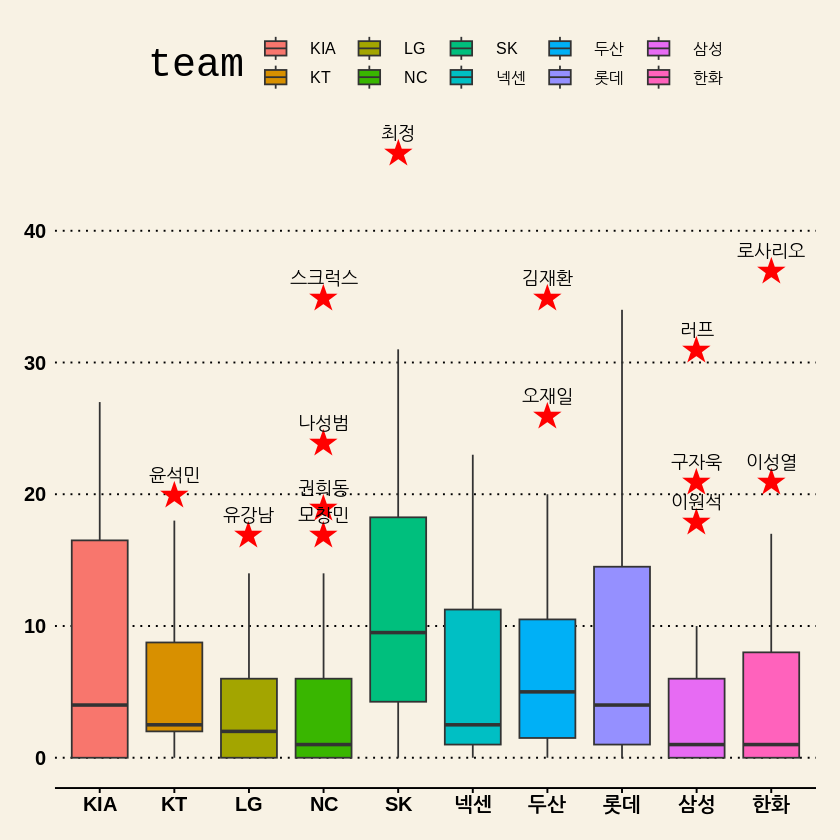

In [ ]:
ggplot(data = HR_outiler, mapping = aes(x = team, y = HR)) +
  geom_boxplot(mapping = aes(fill = team), outlier.color = "red", outlier.shape = "★", outlier.size = 7) +
  geom_text(mapping = aes(label = is_out), na.rm = T, vjust = -1) +
  theme(axis.title.x = element_text(family = fonts()[1])) + #한글설정
  theme_wsj()

In [ ]:
install.packages("psych")
library("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [ ]:
DF %>% filter(team == "LG") %>% select(avg, AB, R) %>% describe() %>% round(2)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
avg,1,292,0.23,0.10,0.25,0.24,0.06,0,1,1,0.82,12.06,0.01
AB,2,294,188.22,159.59,159.50,175.29,200.89,0,533,533,0.47,-1.09,9.31
R,3,294,26.09,24.36,20.00,23.02,25.20,0,95,95,0.88,-0.13,1.42


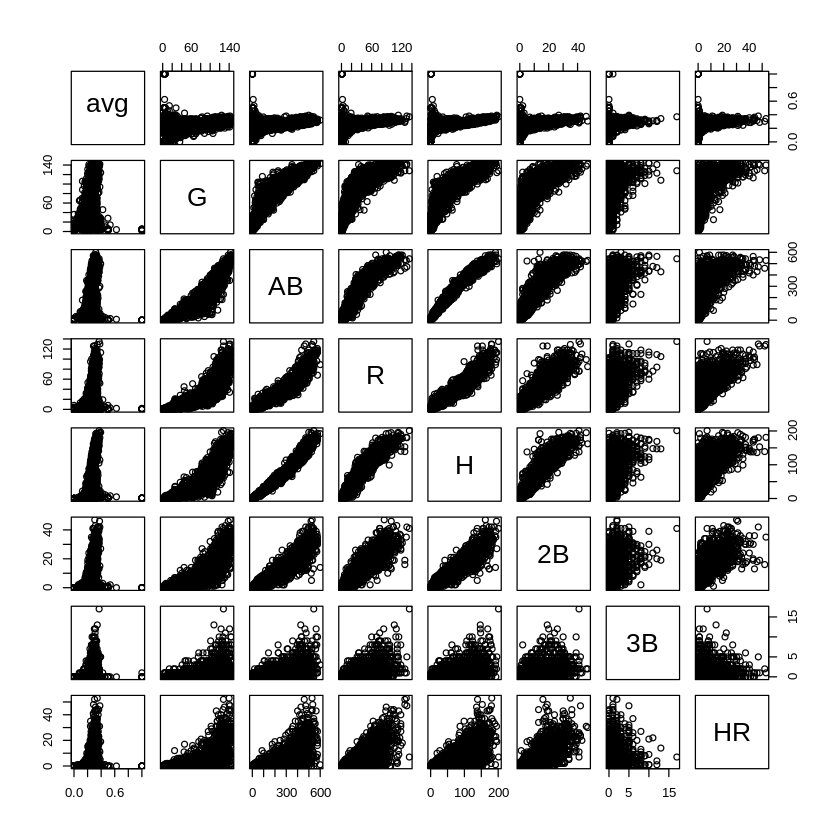

In [ ]:
DF[ , 5:12] %>% plot()

In [ ]:
DF_NAto0 <- DF %>% replace(is.na(.), 0)
DF_NAto0 %>% show()

# A tibble: 2,454 × 29
   batter_id batter_name  year team    avg     G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <dbl> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.339    50   183    27    62     9     0
 2         1 강경학       2011 한화  0         2     1     0     0     0     0
 3         1 강경학       2014 한화  0.221    41    86    11    19     2     3
 4         1 강경학       2015 한화  0.257   120   311    50    80     7     4
 5         1 강경학       2016 한화  0.158    46   101    16    16     3     2
 6         1 강경학       2017 한화  0.214    59    84    17    18     2     1
 7         1 강경학       2018 한화  0.278    77   245    42    68    11     1
 8         2 강구성       2013 NC    0         2     2     0     0     0     0
 9         2 강구성       2015 NC    0.2       4     5     0     1     1     0
10         2 강구성       2016 NC    0         2     3     0     0     0     0
# ℹ 2,444 more rows
# ℹ 18 more variables: HR <int>, TB <int>, RBI <int>

In [ ]:
DF %>% show()

# A tibble: 2,454 × 29
   batter_id batter_name  year team    avg     G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <dbl> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.339    50   183    27    62     9     0
 2         1 강경학       2011 한화  0         2     1     0     0     0     0
 3         1 강경학       2014 한화  0.221    41    86    11    19     2     3
 4         1 강경학       2015 한화  0.257   120   311    50    80     7     4
 5         1 강경학       2016 한화  0.158    46   101    16    16     3     2
 6         1 강경학       2017 한화  0.214    59    84    17    18     2     1
 7         1 강경학       2018 한화  0.278    77   245    42    68    11     1
 8         2 강구성       2013 NC    0         2     2     0     0     0     0
 9         2 강구성       2015 NC    0.2       4     5     0     1     1     0
10         2 강구성       2016 NC    0         2     3     0     0     0     0
# ℹ 2,444 more rows
# ℹ 18 more variables: HR <int>, TB <int>, RBI <int>

In [ ]:
avg2HR_cor <- DF_NAto0[, 5:12] %>% cor() %>% round(2)
avg2HR_cor

,avg,G,AB,R,H,2B,3B,HR
avg,1.00,0.50,0.50,0.50,0.53,0.49,0.27,0.38
G,0.50,1.00,0.93,0.86,0.89,0.83,0.49,0.63
AB,0.50,0.93,1.00,0.95,0.99,0.92,0.53,0.73
R,0.50,0.86,0.95,1.00,0.96,0.91,0.57,0.77
H,0.53,0.89,0.99,0.96,1.00,0.94,0.54,0.75
2B,0.49,0.83,0.92,0.91,0.94,1.00,0.47,0.75
3B,0.27,0.49,0.53,0.57,0.54,0.47,1.00,0.21
HR,0.38,0.63,0.73,0.77,0.75,0.75,0.21,1.00


In [ ]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



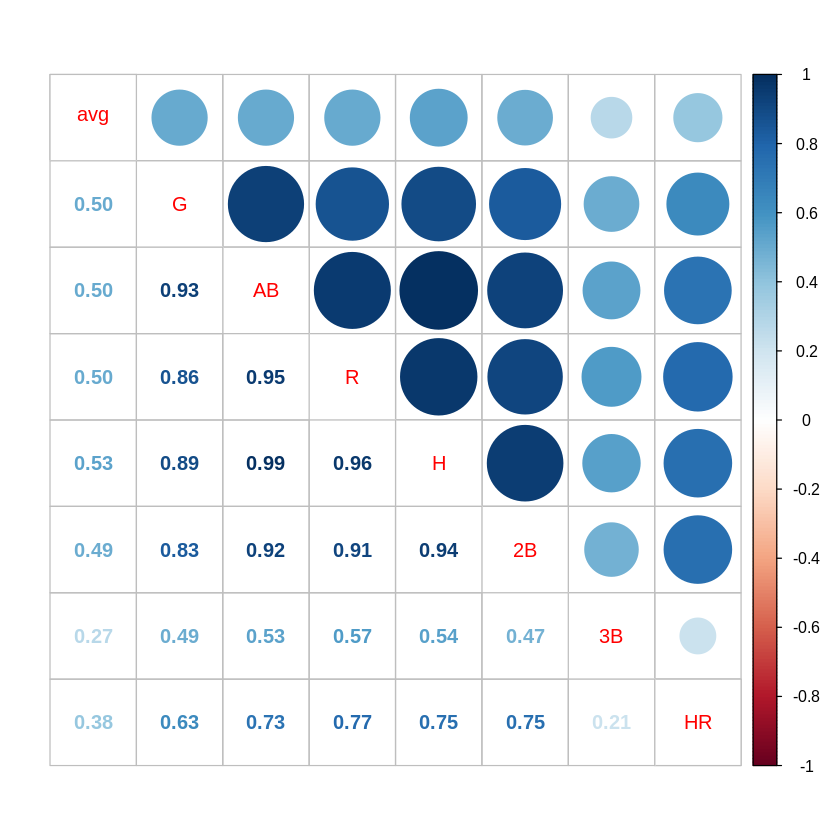

In [ ]:
corrplot.mixed(avg2HR_cor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘ggrepel’, ‘seriation’


Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in 

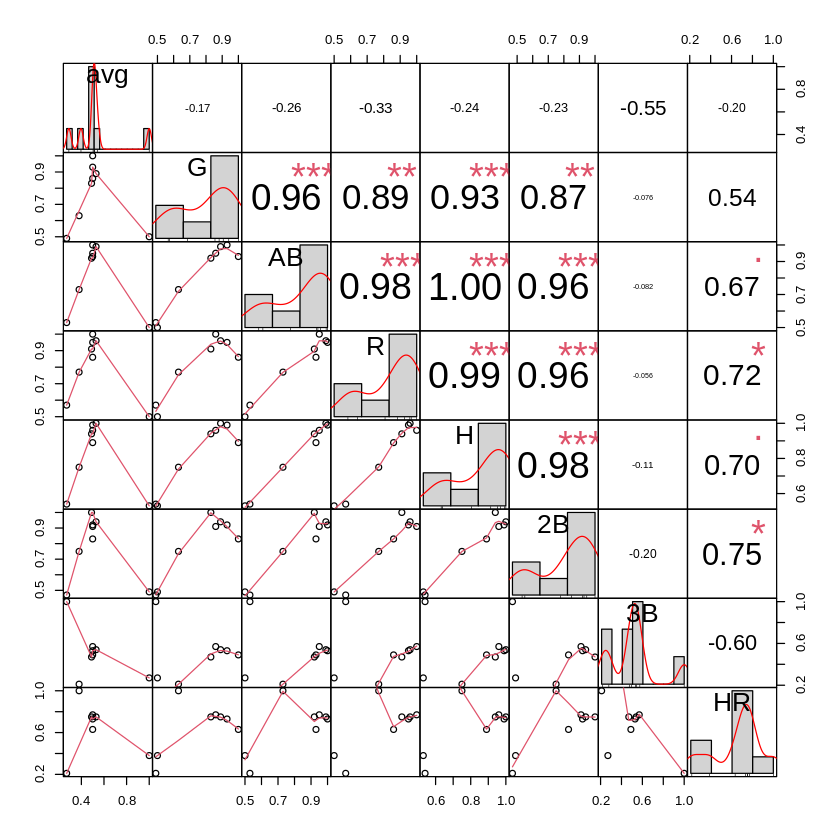

In [ ]:
install.packages("GGally")
install.packages("PerformanceAnalytics")
install.packages("corrr")

PerformanceAnalytics::chart.Correlation(avg2HR_cor, histogram=TRUE, pch=19)